# Numerical integration

Reading: GGK Sec 9.2, 9.3

**Objectives: Approximate $\int_a^b f(x) dx$ by a discrete sum $\sum_0^N \omega_j\, \,f(x_j)$.**

Where should one choose the "quadrature nodes" $x_j$ and the corresponding weights $\omega_j$?

General principle: 
* Interpolate $f(x)$ by $f_{int}(x)$, and $$\int_a^b f(x) dx = \int_a^b f_{int}(x) dx + Err $$
* The quadrature rule $\sum_0^N \omega_j f(x_j) = \int_a^b f_{int}(x) dx,$ where the latter integral is calculated analytically
* The **error** comes from the interpolation error
* If the interpolation is done *piecewise*, we call the resulting quadrature rule the composite quadrature rule.

## A few typical quadrature rules from polynomial interpolations

Let's take a look at them directly by the codes below.

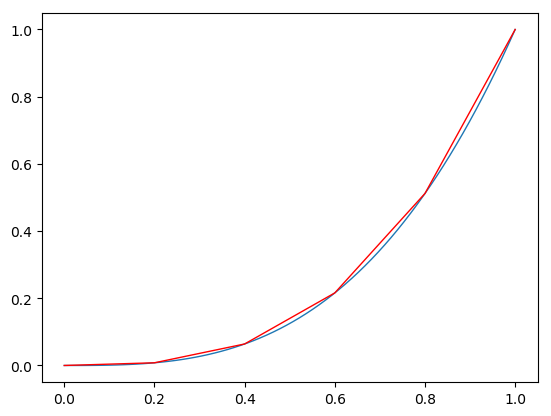

In [3]:
using PyPlot


f(x)=x.^3

z=linspace(0.,1.,70)  # the plotting grid, much finer than the quadrature nodes
plot(z,f(z), linewidth=1)


n=6
h=1/n
x=linspace(0,1.,n)
plot(x,f(x),"r", linewidth=1);

In [11]:
# x contains the nodes {x1,x2,...,xn} and f contains {f(x1),f(x2),...,f(xn)}. 
# assumes that x and f are column vectors
function trapezoidal_rule(f, x)
    
    #interpolate two neighboring nodes by a straight line and integrate the straight line.
    
    sum=0.0
    
    for i=1:length(x)-1
        sum+=(f[i]+f[i+1])/2.0*(x[i+1]-x[i]) 
    end
    
    sum
end

trapezoidal_rule (generic function with 1 method)

### Numerical study of the rate of convergence

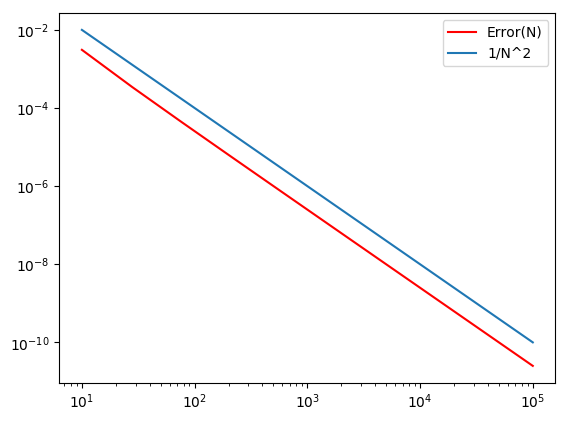

PyObject <matplotlib.legend.Legend object at 0x13e0e6d50>

In [19]:
N=round.(Int,logspace(1,5,10))   # create 100 logarithmically spaced n's between 10^1 and 10^5

err=zeros(length(N))  # we will fill this Vector with the errors

exact_soln = 1./4. # for f(x)=x^3

for k=1:length(N)
    x=linspace(0.0,1., N[k])
    
    err[k]=abs( trapezoidal_rule(f(x), x)- exact_soln )
end

fig, ax = subplots()

ax[:loglog](N,err, "r", label="Error(N)") # The error curve (red): reveals how the error decreases 
                                          # as a function of the total number of quadrature nodes used
ax[:legend](loc="upper right")

ax[:loglog](N,1./N.^2, label="1/N^2")  # reveals a curve that decreases with rate proportional to 1/N^2; first order convergence
ax[:legend](loc="upper right")


## Trapezoidal rule on uniform grids

Learning objectives:
* Recongnizes the special convergence of Trapezoidal rule for integrating
    * unifrom grids
    * periodic functions
    

In [4]:
# Assumes uniform grids
function trapezoidal_rule(f, h::Float64)
    
    #interpolate two neighboring nodes by a straight line and integrate the straight line.
    
    s=0.0
    
    for i=1:length(x)-1
        s+=h*(f[i]+f[i+1])/2.0
    end
    
    # a more efficient way is to simply write the following
    # s=h*(sum( f[2:end-1])+0.5*(f[1]+f[end]))
    
    s
end

trapezoidal_rule (generic function with 1 method)

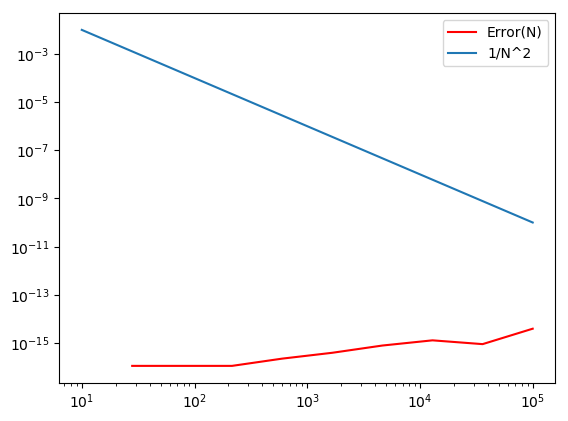

PyObject <matplotlib.legend.Legend object at 0x12f820c90>

In [5]:
g(x)=sin(6π*x)^2

N=round.(Int,logspace(1,5,10))   # create 100 logarithmically spaced n's between 10^1 and 10^5

err=zeros(length(N))  # we will fill this Vector with the errors

exact_soln = 1./2. # for 

for k=1:length(N)  
    x=linspace(0.0,1., N[k]+1)
    err[k]=abs( trapezoidal_rule(g.(x), 1/N[k])- exact_soln )
end

fig, ax = subplots()

ax[:loglog](N,err, "r", label="Error(N)") # The error curve (red): reveals how the error decreases 
                                          # as a function of the total number of quadrature nodes used
ax[:legend](loc="upper right")

ax[:loglog](N,1./N.^2, label="1/N^2")  # reveals a curve that decreases with rate proportional to 1/N^2; first order convergence
ax[:legend](loc="upper right")



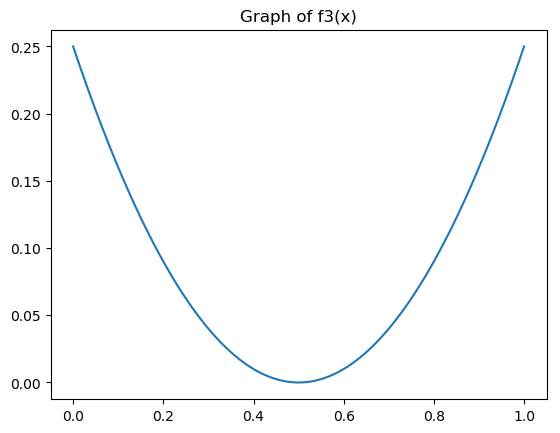

PyObject Text(0.5,1,u'Graph of f3(x)')

In [2]:
using PyPlot
using QuadGK

f3(x)=abs(x-0.5).^2 

exact_soln, abs_err=quadgk(f3, 0,1)

x=linspace(0.0,1.0, 500)
plot(x, f3.(x))
title("Graph of f3(x)")

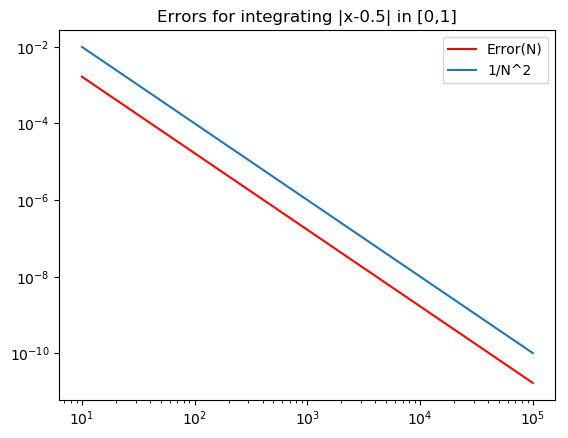

PyObject Text(0.5,1,u'Errors for integrating |x-0.5| in [0,1]')

In [14]:
using PyPlot
using QuadGK

exact_soln, abs_err=quadgk(f3, 0,1)

N=round.(Int,logspace(1,5,100))   # create 100 logarithmically spaced n's between 10^1 and 10^5

err=zeros(length(N))  # we will fill this Vector with the errors

for k=1:length(N)  
    x=linspace(0.0,1.0, N[k]+1)
    err[k]=abs( trapezoidal_rule(f3.(x), 1/N[k]) - exact_soln)
end

fig, ax = subplots()

ax[:loglog](N,err, "r", label="Error(N)") # The error curve (red): reveals how the error decreases 
                                          # as a function of the total number of quadrature nodes used
ax[:legend](loc="upper right")

ax[:loglog](N,1./N.^2, label="1/N^2")  # reveals a curve that decreases with rate proportional to 1/N^2; first order convergence
ax[:legend](loc="upper right")
title("Errors for integrating |x-0.5| in [0,1]")

In [8]:
err

100-element Array{Float64,1}:
 0.0        
 0.00206612 
 2.77556e-17
 0.00147929 
 0.00111111 
 0.0        
 0.000865052
 0.000692521
 0.000566893
 0.00047259 
 0.0004     
 0.0        
 0.000260146
 ⋮          
 0.0        
 1.11022e-16
 0.0        
 5.55112e-17
 0.0        
 5.55112e-17
 6.33839e-11
 0.0        
 2.22045e-16
 2.77556e-17
 5.55112e-17
 5.55112e-17

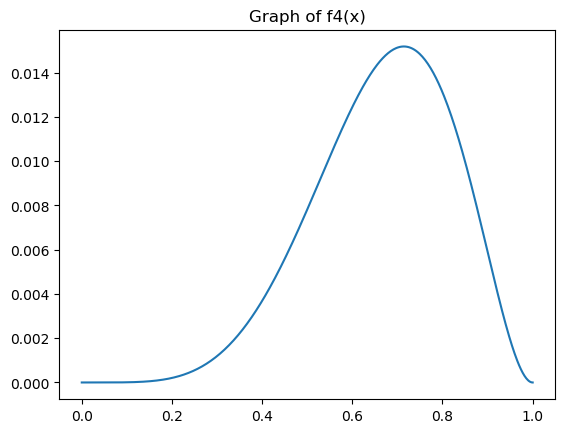

PyObject Text(0.5,1,u'Graph of f4(x)')

In [9]:
f4(x)=x^3*x^2*(1-x)^2

exact_soln, abs_err=quadgk(f4, 0,1)

x=linspace(0.0,1.0, 500)
plot(x, f4.(x))
title("Graph of f4(x)")

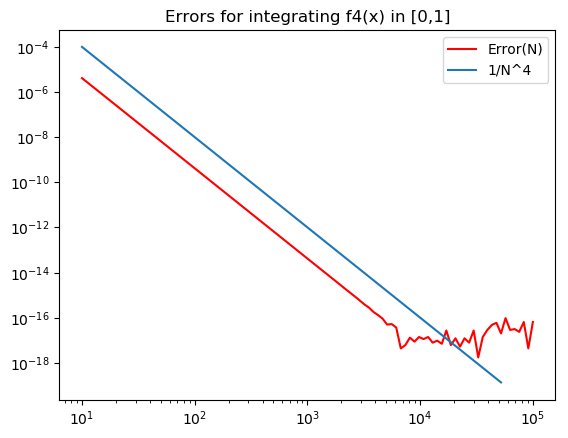

PyObject Text(0.5,1,u'Errors for integrating f4(x) in [0,1]')

In [12]:
exact_soln, abs_err=quadgk(f4, 0,1)

N=round.(Int,logspace(1,5,100))   # create 100 logarithmically spaced n's between 10^1 and 10^5

err=zeros(length(N))  # we will fill this Vector with the errors

for k=1:length(N)  
    x=linspace(0.0,1.0, N[k]+1)
    err[k]=abs( trapezoidal_rule(f4.(x), 1/N[k]) - exact_soln)
end

fig, ax = subplots()

ax[:loglog](N,err, "r", label="Error(N)") # The error curve (red): reveals how the error decreases 
                                          # as a function of the total number of quadrature nodes used
ax[:legend](loc="upper right")

ax[:loglog](N,1./N.^4, label="1/N^4")  # reveals a curve that decreases with rate proportional to 1/N^2; first order convergence
ax[:legend](loc="upper right")
title("Errors for integrating f4(x) in [0,1]")

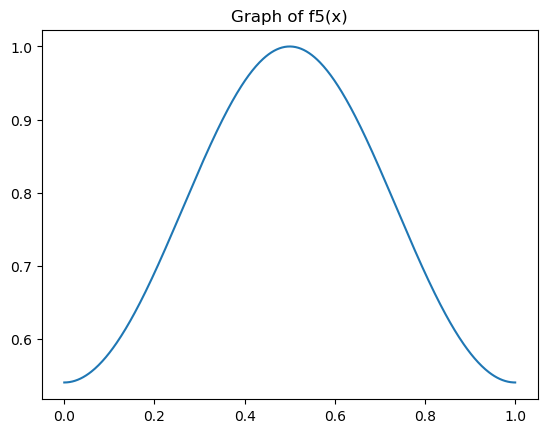

PyObject Text(0.5,1,u'Graph of f5(x)')

In [15]:
f5(x)=cos(cos(π*x))

exact_soln, abs_err=quadgk(f5, 0,1)

x=linspace(0.0,1.0, 500)
plot(x, f5.(x))
title("Graph of f5(x)")

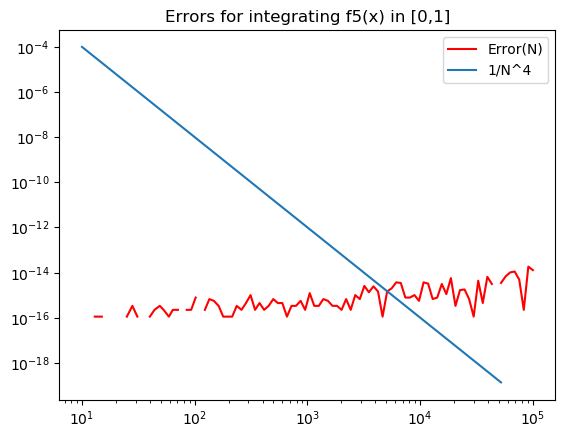

PyObject Text(0.5,1,u'Errors for integrating f5(x) in [0,1]')

In [16]:
exact_soln, abs_err=quadgk(f5, 0,1)

N=round.(Int,logspace(1,5,100))   # create 100 logarithmically spaced n's between 10^1 and 10^5

err=zeros(length(N))  # we will fill this Vector with the errors

for k=1:length(N)  
    x=linspace(0.0,1.0, N[k]+1)
    err[k]=abs( trapezoidal_rule(f5.(x), 1/N[k]) - exact_soln)
end

fig, ax = subplots()

ax[:loglog](N,err, "r", label="Error(N)") # The error curve (red): reveals how the error decreases 
                                          # as a function of the total number of quadrature nodes used
ax[:legend](loc="upper right")

ax[:loglog](N,1./N.^4, label="1/N^4")  # reveals a curve that decreases with rate proportional to 1/N^2; first order convergence
ax[:legend](loc="upper right")
title("Errors for integrating f5(x) in [0,1]")

## Trapezoidal rule converges with different rates for different periodic functions!

**What's the difference?**

## Gauss quadratures

#### Learning objetctives 
* Know how to formulate the problem for constructing a Gauss quadrature
* Know what are the quadrature points and how to scale and translate them
    * The nodes are **judiciously** chosen as roots of certain polynomials
* Know the accruacy of the resulting quadrature rule

## Clenshaw-Curtis quadratures

#### Learning objetctives 
* Know the relation to Chebyshev polynomials and trigonometric interpolation
* Know how to use this quadrature rule for integration over different intervals
* Know the accruacy of the resulting quadrature
